# Wave Equation CTCS + FDE Solution

## 1. Project Brief
Solve wave equation using Centered Time & Centered Space finite difference equations (CTCS + FDE).
Code should include: 
 -  Plots/Animations 
 -  Von Neumann Criterion

## 2. Key Equations 

Wave Equation PDE: $$\frac{\partial^{2} u}{\partial t^{2}} = c^{2}\frac{\partial^{2} u}{\partial x^{2}}$$ 

Wave Equation FDE: 
$$ \frac{U_j^{i+1} - 2U_j^i + U_j^{i-1}}{\Delta t^2} = c^2\frac{U_{j+1}^i - 2U_j^i + U_{j-1}^i}{\Delta x^2}$$ 

Recursion Equation: 

$$ U_j^{i+1} = 2U_j^i - U_j^{i-1} + \mu (U_{j+1}^i - 2 U_j^i + U_{j-1}^i) $$ 

Where: 

$$ \mu = (c\frac{\Delta t}{\Delta x})^2 $$ 


## 1.3 Load Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import timeit

## 1.4 Conditions
Define initial, boundary and discretisation conditions.

In [3]:
# Parameters for problem
min_x , max_x = 0 , 2*np.pi

min_t , max_t = 0 , 6.2

c = 10
space_steps = 50
time_steps = 600

# Set up grid spaces
delta_xs = np.linspace(start = min_x,stop = max_x,num = space_steps) 
delta_ts = np.linspace(start = min_t,stop = max_t,num = time_steps) 

# Calculate delta_x and delta_t based on grid 
delta_x = delta_xs[1] - delta_xs[0]
delta_t = delta_ts[1] - delta_ts[0]

# Initial Conditions  u(x,0) = 2sin(x + 0) 
u_n = [2*np.sin(x) for x in delta_xs]

 
# Boundary conditions  u(0,t) = sin(0 - ct) + sin(0 + ct)
u_j = [(np.sin(-c*t) + np.sin(c*t)) for t in delta_ts]


mu = (c*(delta_t/delta_x))**2
print(mu,delta_x,delta_t)  

print(min(u_n))

0.6515716166068884 0.1282282715750936 0.010350584307178631
-1.9989724324013758


## 1.5 Initialise Solution Matrix
Initialize a matrix with all zero entries. Then add initial and boundary conditions arrays accordingly.

In [4]:
# initialize a matrix with all zero entries
matrix = []
i = 0
while i < time_steps: 
    #row = [0 for x in range(space_steps)]  
    row = np.zeros(space_steps)
    matrix.append(row)
    i += 1 

# place time as rows t = 0 --> row 0 
matrix[0] = u_n 
matrix

# place space as columns x = 2 --> last column
for i in range(time_steps): 
    matrix[i][0] = u_j[i]   

## 1.6 Calculate Entries for Solution Matrix
Calculate values of u for each grid point. 
Recursion Equation: 

$$ U_j^{i+1} = 2U_j^i - U_j^{i-1} + \mu (U_{j+1}^i - 2 U_j^i + U_{j-1}^i) $$ 


In [5]:
for j in range(1,space_steps-1): 
    matrix[1][j] = matrix[0][j] + (1/2) * mu * (matrix[0][j + 1] - 2*matrix[0][j] + matrix[0][j - 1])

for i in range(1,time_steps-1):
    for j in range(1,space_steps-1): 
        matrix[i+1][j] = 2*matrix[i][j] - matrix[i - 1][j] + mu * (matrix[i][j + 1] - 2*matrix[i][j] + matrix[i][j - 1])

## 1.7 Plot Solution(s)

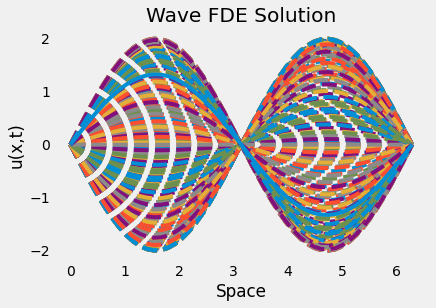

According to the Von Neumann Condition our solution is stable:  0.6515716166068884


In [6]:
%matplotlib inline 
plt.style.use('fivethirtyeight')

labels = [] 
for i in range(0,time_steps-1,4):
    plt.plot([x for x in delta_xs],matrix[i],linestyle = 'dashed')   
    labels.append(str(i) + 's')  
plt.plot([x for x in delta_xs],matrix[-1])
labels.append(str(max_t) + 's') 
plt.xlabel('Space') 
plt.ylabel('u(x,t)')  

#plt.legend(labels) 
plt.title('Wave FDE Solution')  
plt.grid()
plt.show()
if mu <= 1: 
    print('According to the Von Neumann Condition our solution is stable: ',mu) 
else: 
    print('According to the Von Neumann Condition our solution is unstable: ',mu)

<IPython.core.display.Javascript object>


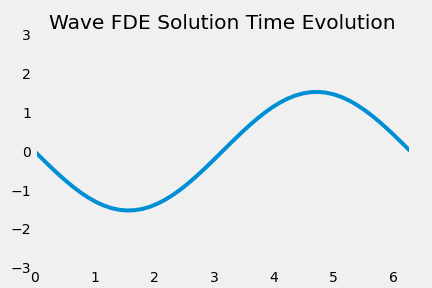

In [7]:
%matplotlib notebook
plt.style.use('fivethirtyeight')
from matplotlib.animation import FuncAnimation
x = delta_xs 

fig = plt.figure() 

lines = plt.plot([]) 
line = lines[0] 

plt.xlim(0,delta_xs[-1]) 
plt.ylim(-3,3)
plt.grid()  

plt.title('Wave FDE Solution Time Evolution')
def animate(frame): 
    y = matrix[frame] 
    line.set_data((x,y)) 
    
anim = FuncAnimation(fig,animate,frames=time_steps,interval = 100) 
# video = anim.to_html5_video() 
# html = display.HTML(video) 
# display.display(html)
